In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import sys
sys.path.append("../Handlers")
import nn_traintest

In [2]:
spam_assassin = pd.read_csv("./SpamAssassin.csv")

metric_results = []

In [3]:
subject = "Subject"
body = "Body"
spam_assassin_input = spam_assassin.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)
spam_assassin_input

0       Re: New Sequences Window     Date:        Wed,...
1       [zzzzteana] RE: Alexander Martin A posted:\nTa...
2       [zzzzteana] Moscow bomber Man Threatens Explos...
3       [IRR] Klez: The Virus That  Won't Die Klez: Th...
4       Re: Insert signature On Wed Aug 21 2002 at 15:...
                              ...                        
4193    Preferred Non-Smoker Rates for Smokers  \t Pre...
4194    How to get 10,000 FREE hits per day to any web...
4195    Cannabis Difference ****Mid-Summer Customer Ap...
4196    [ILUG] WILSON  KAMELA ATTN:SIR/MADAN      \n\n...
4197    nan mv 00001.317e78fa8ee2f54cd4890fdc09ba8176 ...
Length: 4198, dtype: object

In [4]:
cnn = nn_traintest.ConvolutionalNNClassifier("SpamAssassin")
cnn.load_data(spam_assassin_input, spam_assassin["Is_spam"])

In [5]:
cnn.split(test_size=0.1, valid_size=0.1)
cnn.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [6]:
cnn.complex_build()

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.5974 - loss: 0.7585 - precision: 0.3176 - recall: 0.2040 - val_accuracy: 0.6357 - val_loss: 0.6802 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7122 - loss: 0.5508 - precision: 0.6074 - recall: 0.2189 - val_accuracy: 0.3643 - val_loss: 0.8203 - val_precision: 0.3643 - val_recall: 1.0000
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9632 - loss: 0.1005 - precision: 0.9542 - recall: 0.9278 - val_accuracy: 0.3929 - val_loss: 0.9974 - val_precision: 0.3750 - val_recall: 1.0000
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9853 - loss: 0.0700 - precision: 0.9755 - recall: 0.9797 - val_accuracy: 0.7262 - val_loss: 0.4738 - val_precision: 0.5709 - val_recall: 1.0000
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.9927 - loss: 0.0297 - precision: 0.9841 - recall: 0.9924 - val_accuracy: 0.9333 - val_loss: 

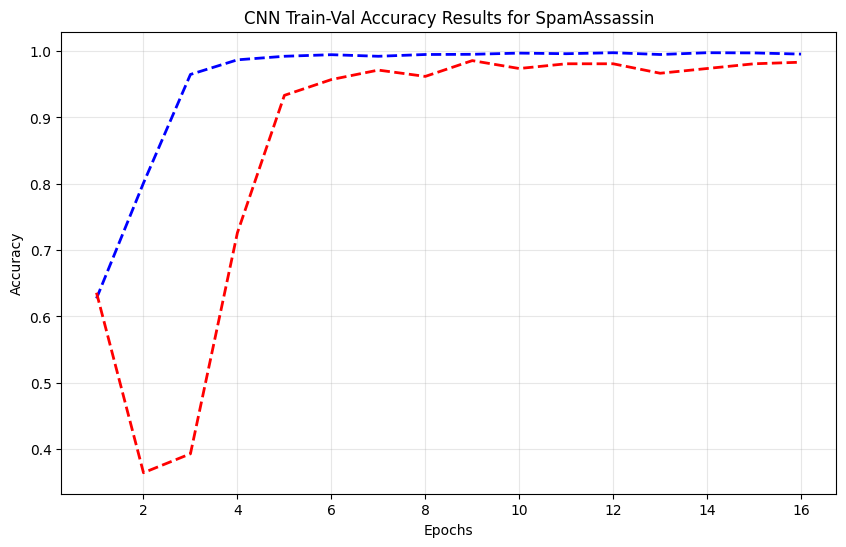

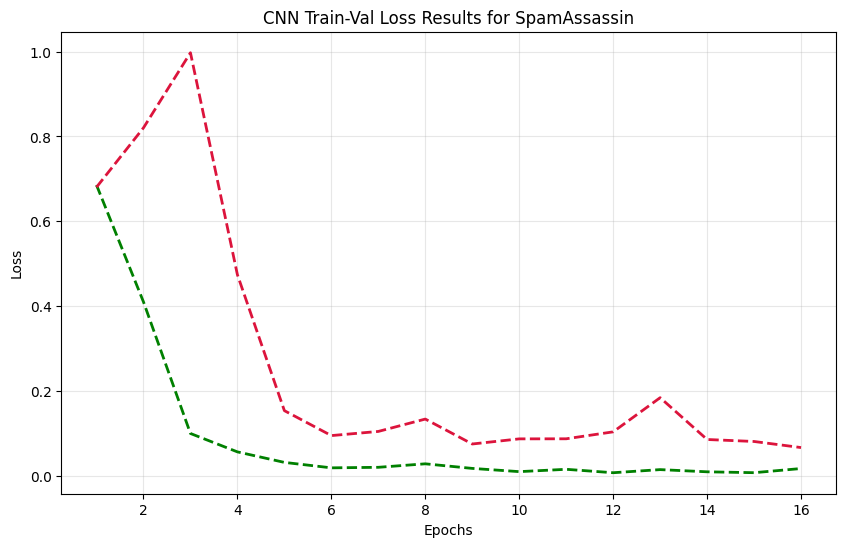

In [7]:
cnn.plot_training_validation_accuracy()
cnn.plot_training_validation_loss()

In [8]:
metrics = cnn.evaluate()
metric_results.append(metrics)
print(metrics)
del cnn

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
{'dataset': 'SpamAssassin', 'model': 'CNN', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9714076131094287, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9713171818434975, 'macro_precision': 0.9710251237850724, 'macro_recall': 0.9637357818988419, 'macro_f1': 0.967251461988304, 'roc_auc': 0.9637357818988419}, 'confusion_matrix': array([[279,   4],
       [  8, 129]], dtype=int64), 'epochs': 16}


In [9]:
rnn = nn_traintest.RecurrentNNClassifier("SpamAssassin")
rnn.load_data(spam_assassin_input, spam_assassin["Is_spam"])

In [10]:
rnn.split(test_size=0.1, valid_size=0.1)
rnn.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [11]:
rnn.complex_build()

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 40s 304ms/step - accuracy: 0.7548 - loss: 0.4724 - precision: 0.6826 - recall: 0.3876 - val_accuracy: 0.9405 - val_loss: 0.1227 - val_precision: 0.8636 - val_recall: 0.9935
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.9787 - loss: 0.0641 - precision: 0.9631 - recall: 0.9720 - val_accuracy: 0.9762 - val_loss: 0.0923 - val_precision: 0.9554 - val_recall: 0.9804
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 29s 277ms/step - accuracy: 0.9972 - loss: 0.0124 - precision: 0.9935 - recall: 0.9981 - val_accuracy: 0.9714 - val_loss: 0.1412 - val_precision: 0.9490 - val_recall: 0.9739
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 30s 281ms/step - accuracy: 0.9971 - loss: 0.0081 - precision: 0.9942 - recall: 0.9972 - val_accuracy: 0.9476 - val_loss: 0.1351 - val_precision: 0.9068 - val_recall: 0.9542
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 29s 280ms/step - accuracy: 0.9962 - loss: 0.0177 - precision: 0.9973 - recall: 0.9911 - val_accuracy: 0.9476 - val_loss

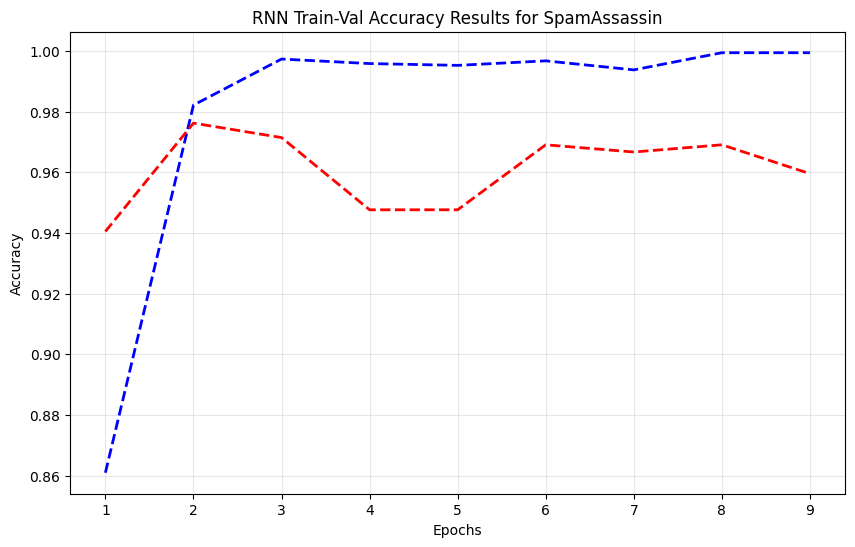

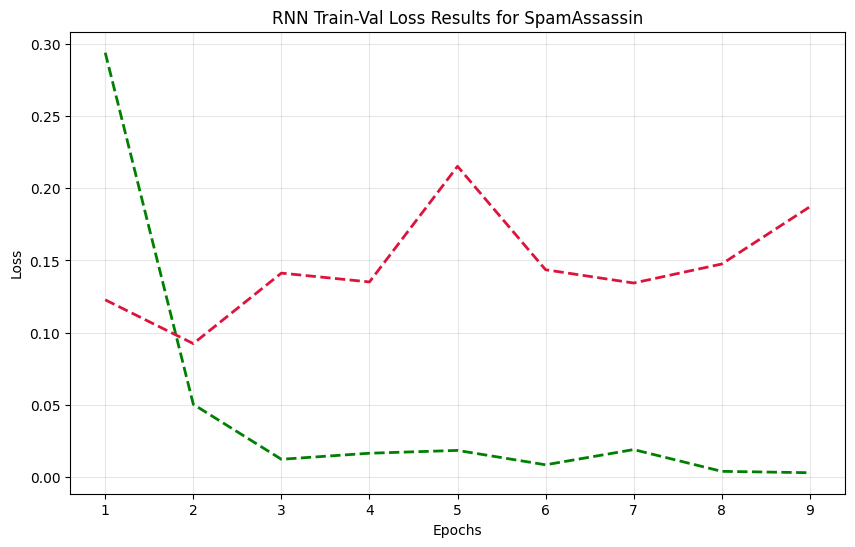

In [12]:
rnn.plot_training_validation_accuracy()
rnn.plot_training_validation_loss()

In [13]:
metrics = rnn.evaluate()
metric_results.append(metrics)
print(metrics)
del rnn

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step
{'dataset': 'SpamAssassin', 'model': 'RNN', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9721729534003901, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9715816326530612, 'macro_precision': 0.9631163060765948, 'macro_recall': 0.9731500348198396, 'macro_f1': 0.967857142857143, 'roc_auc': 0.9731500348198395}, 'confusion_matrix': array([[274,   9],
       [  3, 134]], dtype=int64), 'epochs': 9}


In [14]:
ann = nn_traintest.ArtificialNNClassifier("SpamAssassin")
ann.load_data(spam_assassin_input, spam_assassin["Is_spam"])

In [15]:
ann.split(test_size=0.1, valid_size=0.1)
ann.vectorizing()

Shape of the input data is (3358, 200)


<tf.Tensor: shape=(3358, 200), dtype=int64, numpy=
array([[1643, 3362,    1, ...,    0,    0,    0],
       [ 286,   16,  115, ..., 3852,    6,  919],
       [  81,    2,  304, ...,    0,    0,    0],
       ...,
       [ 930,  372,    1, ...,    0,    0,    0],
       [1116,    7,  478, ...,    0,    0,    0],
       [   2,  208,  127, ...,    7,  745, 3686]], dtype=int64)>

In [16]:
ann.complex_build()

Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7527 - loss: 0.4962 - precision: 0.6250 - recall: 0.5780 - val_accuracy: 0.6357 - val_loss: 0.6026 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9489 - loss: 0.1339 - precision: 0.9235 - recall: 0.9259 - val_accuracy: 0.6357 - val_loss: 0.7738 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9781 - loss: 0.0633 - precision: 0.9635 - recall: 0.9718 - val_accuracy: 0.6643 - val_loss: 0.5544 - val_precision: 1.0000 - val_recall: 0.0784
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9827 - loss: 0.0509 - precision: 0.9688 - recall: 0.9788 - val_accuracy: 0.8119 - val_loss: 0.3618 - val_precision: 1.0000 - val_recall: 0.4837
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9882 - loss: 0.0394 - precision: 0.9720 - recall: 0.9912 - val_accuracy: 0.9595 - va

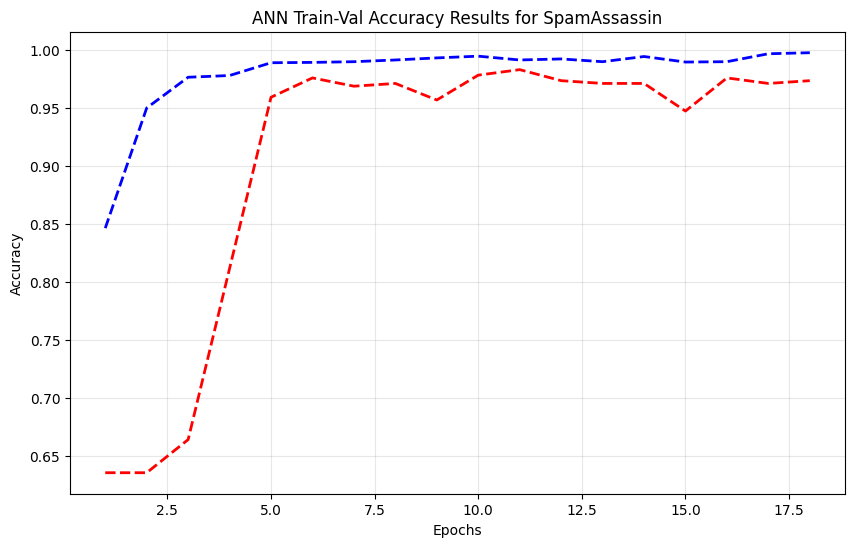

In [17]:
ann.plot_training_validation_accuracy()

In [18]:
metrics = ann.evaluate()
metric_results.append(metrics)
print(metrics)
del ann

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
{'dataset': 'SpamAssassin', 'model': 'ANN', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9714076131094287, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9713171818434975, 'macro_precision': 0.9710251237850724, 'macro_recall': 0.9637357818988419, 'macro_f1': 0.967251461988304, 'roc_auc': 0.9637357818988419}, 'confusion_matrix': array([[279,   4],
       [  8, 129]], dtype=int64), 'epochs': 18}


In [19]:
from traintest import add_to_json_array

print(metric_results)

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./spam_assassin_nn_classification_report.json", metric_results, mode="overwrite")

[{'dataset': 'SpamAssassin', 'model': 'CNN', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9714076131094287, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9713171818434975, 'macro_precision': 0.9710251237850724, 'macro_recall': 0.9637357818988419, 'macro_f1': 0.967251461988304, 'roc_auc': 0.9637357818988419}, 'confusion_matrix': array([[279,   4],
       [  8, 129]], dtype=int64), 'epochs': 16}, {'dataset': 'SpamAssassin', 'model': 'RNN', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9721729534003901, 'wighted_recall': 0.9714285714285714, 'weighted_f1': 0.9715816326530612, 'macro_precision': 0.9631163060765948, 'macro_recall': 0.9731500348198396, 'macro_f1': 0.967857142857143, 'roc_auc': 0.9731500348198395}, 'confusion_matrix': array([[274,   9],
       [  3, 134]], dtype=int64), 'epochs': 9}, {'dataset': 'SpamAssassin', 'model': 'ANN', 'metrics': {'accuracy': 0.9714285714285714, 'weighted_precision': 0.9714076131094287, 'wighted_rec